In [1]:
import sys
sys.path.append("../classes")
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.manifold import TSNE, Isomap, MDS, SpectralEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import numpy as np, pandas as pd
from scipy.cluster import hierarchy
from sklearn.metrics import homogeneity_completeness_v_measure

from geno_classifier import *

from itertools import starmap, product

import GEOparse
from random import randint
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

In [2]:
diseases = ['leukemia',
            'glioma',
            'cervical_cancer',
            'pancreatic_cancer',
            'endometriosis',
            'breast_cancer_2',
            'colon_cancer',
            'prostate_cancer',
            'colorectal_cancer',
            'oral_carcinoma',
            'brain_cancer',
            'renal_carcinoma',
            'esophageal_carcinoma',
            'autism',
            'diabetes',
            'psoriasis',
            'lung_cancer_1',
            'H1N1',
            'HBV']

In [ ]:
# X_diffs, y_diffs = dict(), dict()
# X_nodiffs, y_nodiffs = dict(), dict()
# for disease in diseases:
#     results = pickle.load(open('../results/'+disease+'.results','rb'))
#     try:
#         labels = pickle.load(open('../datasets/'+disease+'_Xy','rb'))["y"]
#     except FileNotFoundError:
#         labels = pickle.load(open('../datasets/'+disease+'_y','rb'))
#     X_diff, y = preprocess_results(results, labels, True, True, False, False)
#     X_diffs[disease] = X_diff
#     y_diffs[disease] = y
    
#     X_nodiff, y_nodiff = preprocess_results(results, labels, use_diff_score=False, use_pathways=False)
#     X_nodiffs[disease] = X_nodiff
#     y_nodiffs[disease] = y_nodiff
# pickle.dump({"X":X_diffs, "y":y_diffs}, open("../datasets/Xy_diffs", 'wb'))
# pickle.dump({"X":X_nodiffs, "y":y_nodiffs}, open("../datasets/Xy_nodiffs", 'wb'))    

In [3]:
X_diffs = pickle.load(open("../datasets/Xy_diffs", 'rb'))["X"]
X_nodiffs = pickle.load(open("../datasets/Xy_nodiffs", 'rb'))["X"]

In [4]:
len(diseases), len(X_diffs), len(X_nodiffs)

(19, 19, 19)

In [6]:
for disease in diseases:
    X_diff = X_diffs[disease].reset_index()
    X_diff["index"] = X_diff["index"].apply(lambda x:x+"_"+disease)
    X_diffs[disease] = X_diff

In [13]:
Xs_ = pd.concat(X_diffs.values()).sample(frac=1)

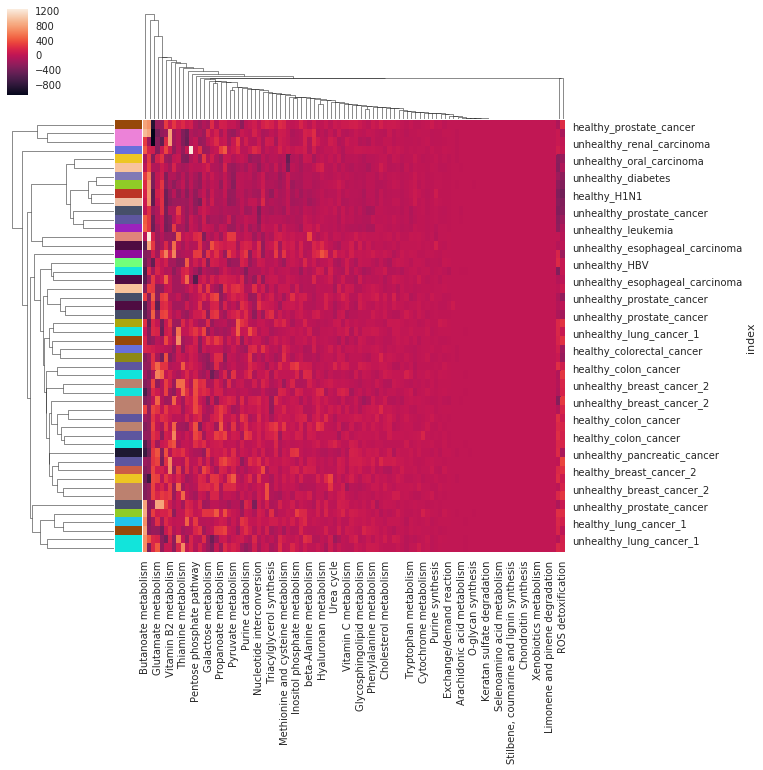

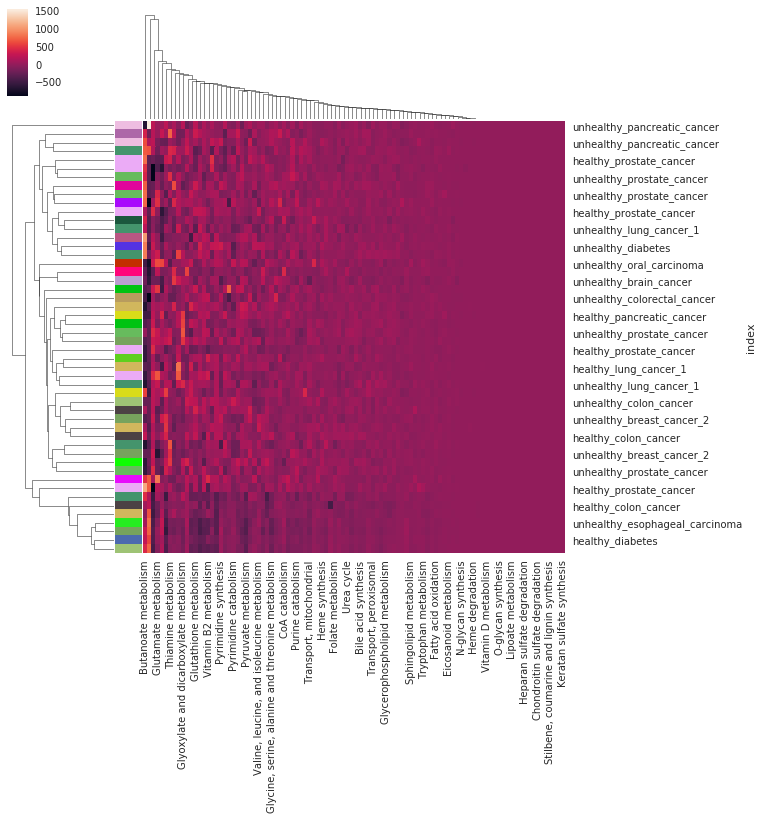

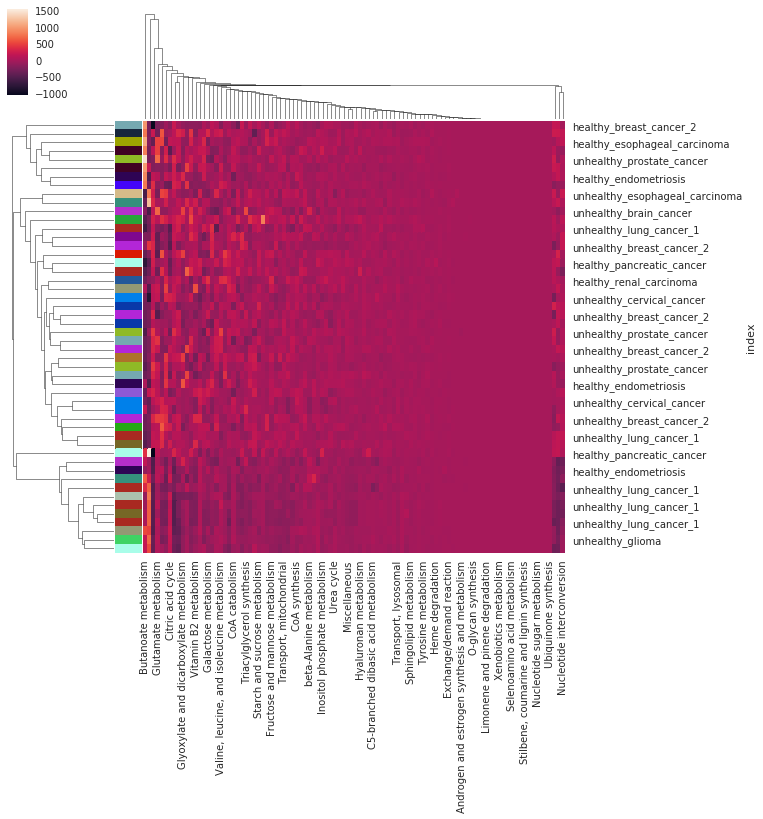

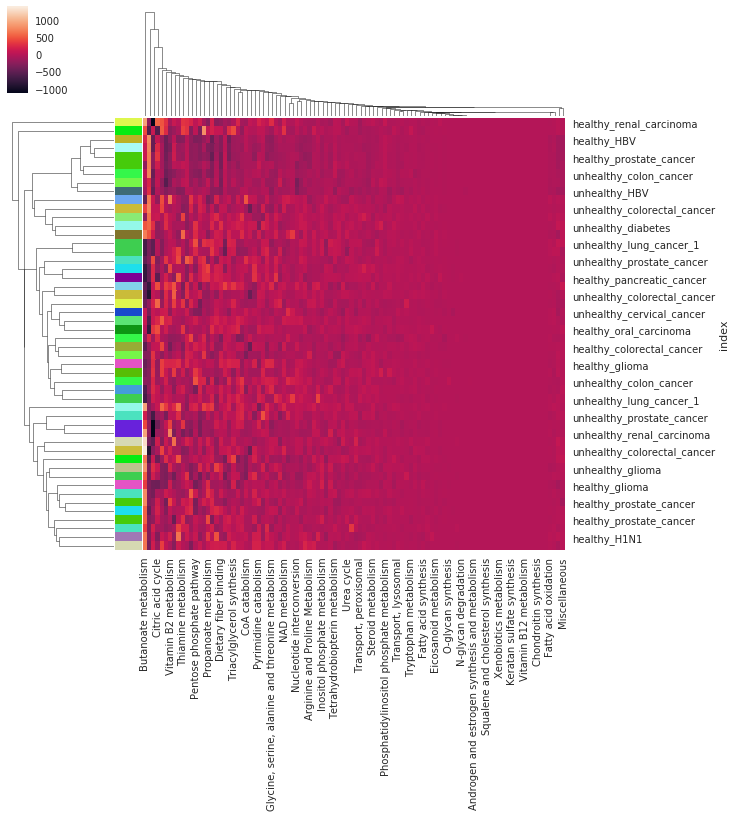

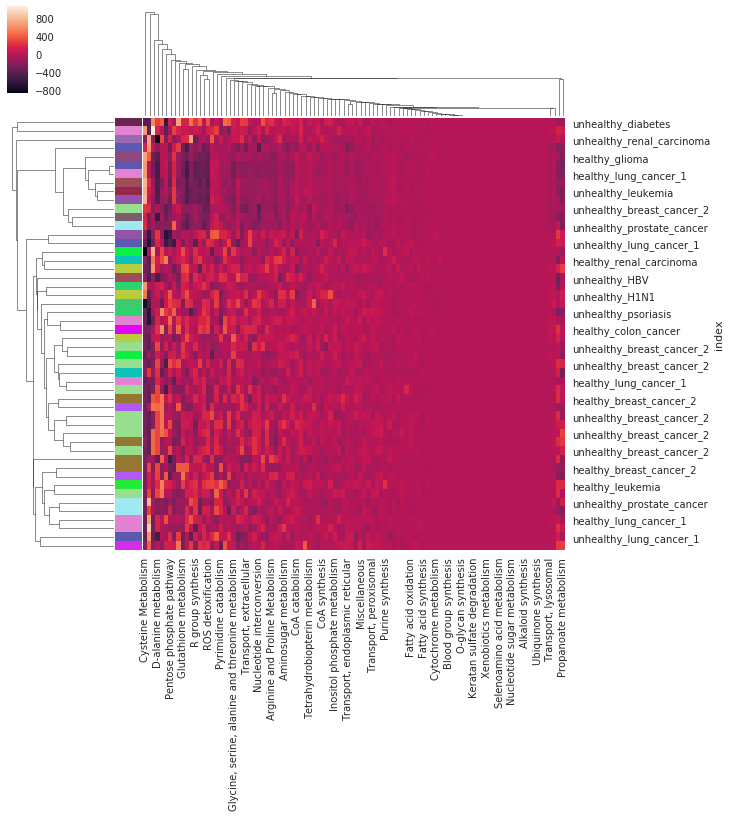

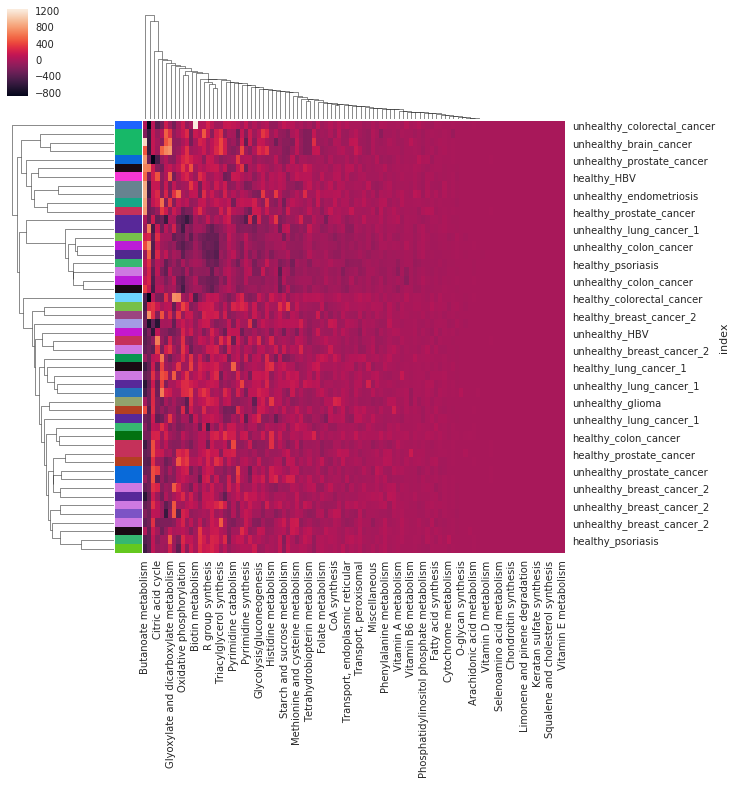

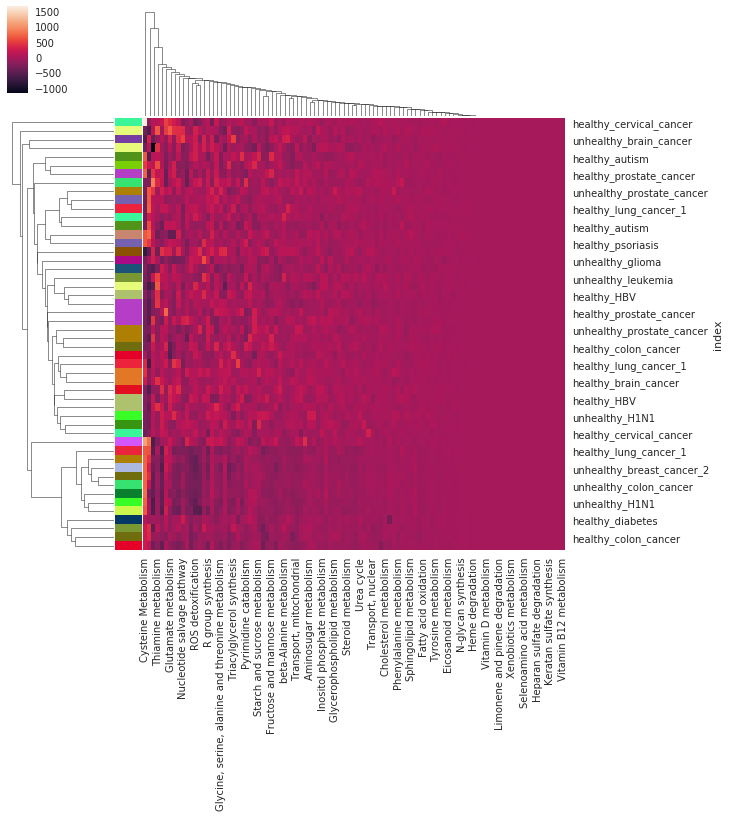

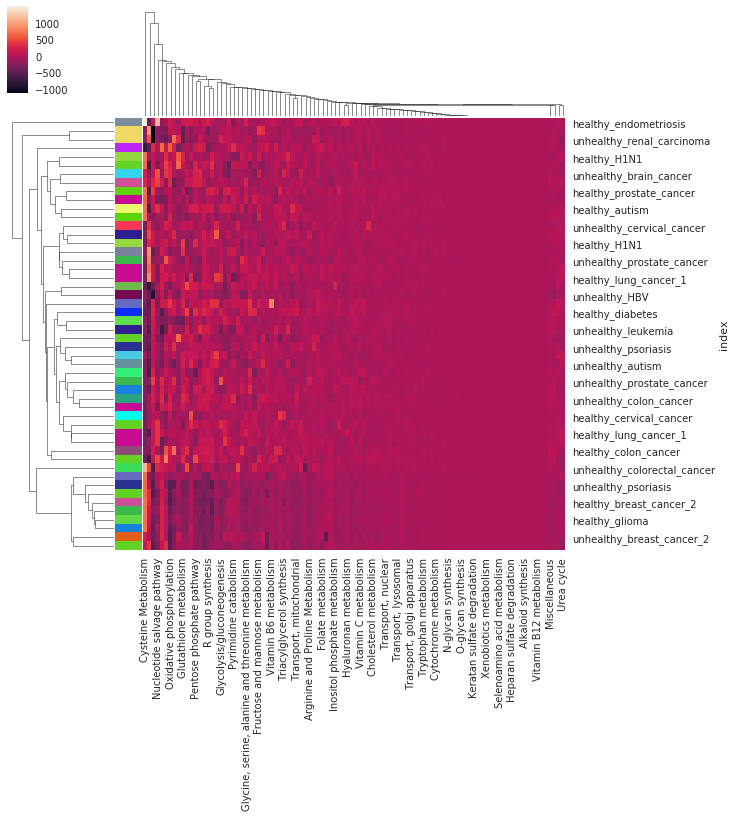

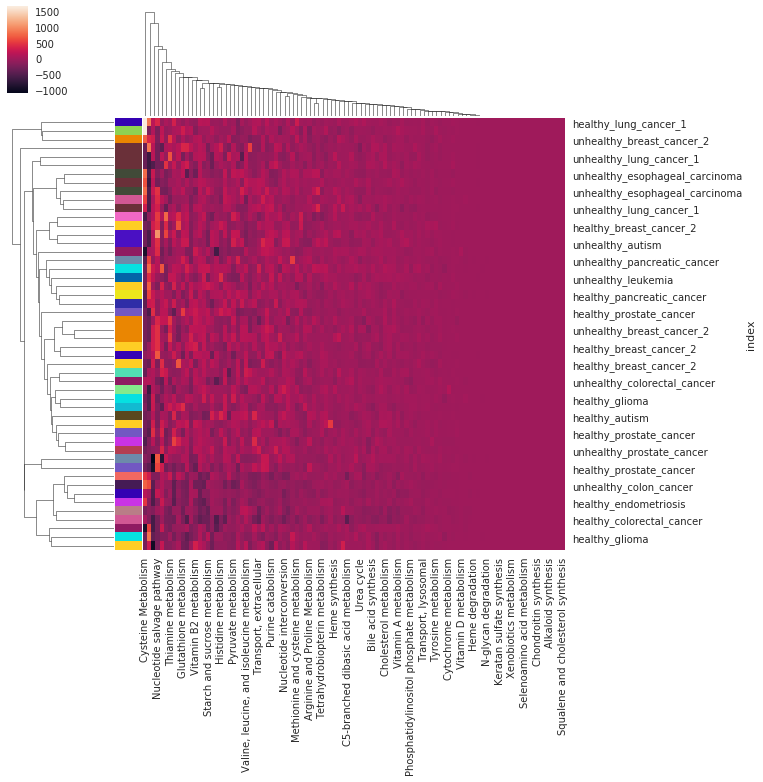

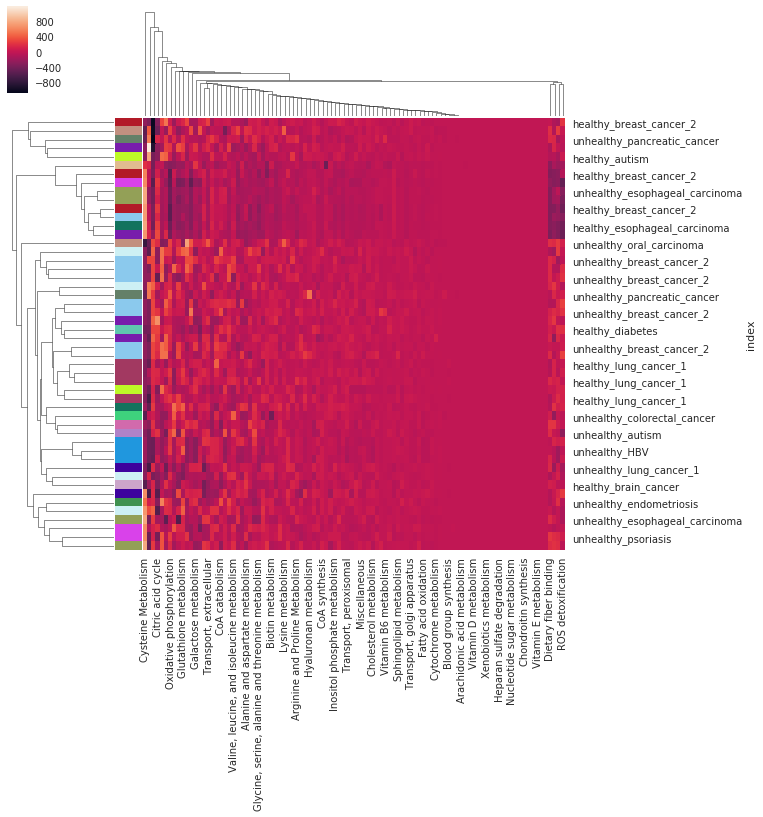

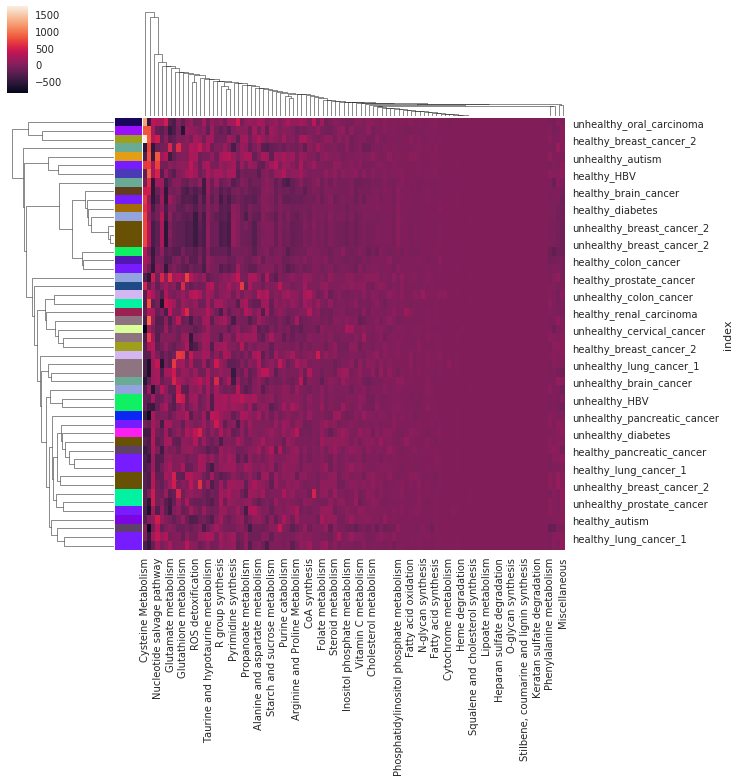

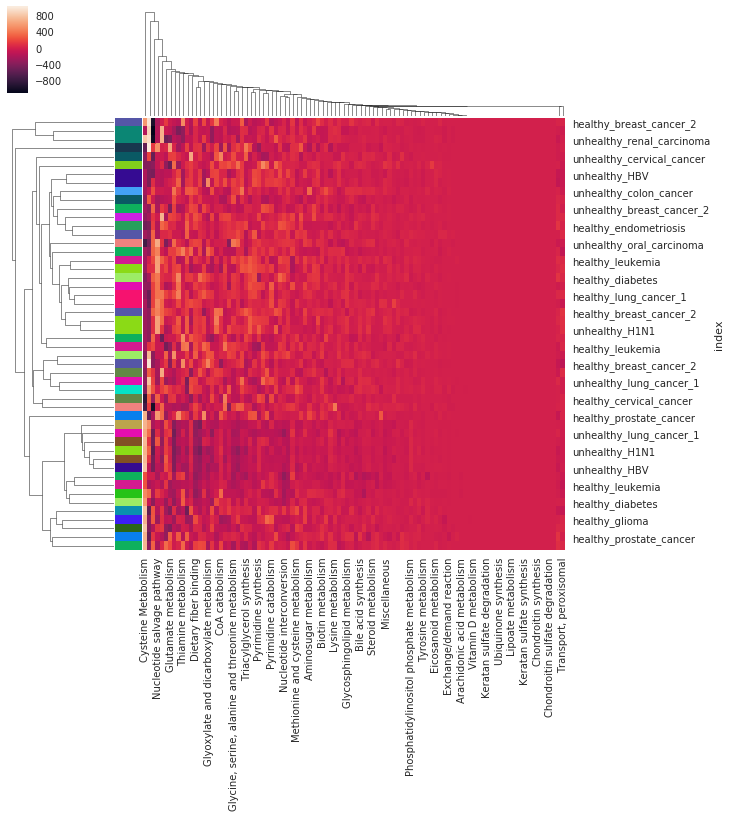

In [15]:
segments = 50
for i in range(int(len(Xs_)/segments)):
    Xs = Xs_[i*segments:(i+1)*segments]
    disease_labels = Xs["index"]
    Xs.set_index("index", inplace=True)
    unique = disease_labels.unique()
    colors = ['#%06X' % randint(0, 0xFFFFFF) for i in range(len(unique))]
    lut = dict(zip(unique, colors))
    row_colors = disease_labels.map(lut)
    g = sns.clustermap(Xs, row_colors=list(row_colors))